# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains Calibration Instruction:
https://docs.google.com/presentation/d/1-jEynFIkjDR88QFtbHN2Iz8DXY8wMVet/edit#slide=id.p1

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [6]:
import helper.testdata as testdata
import helper.utils as utils
import helper.calculate as calculate
import helper.visualize as visualize

## Chain Calibration Dataset (MP VII) ##
Artificial Time Series Data for Testing chain discovery algorithms.
Each time series has a chain, with eight links, and each link is of length 127.

Answering the following questions:
- Can we find the chains if we give the wrong length?
- Can we find the chains if we delete (or add huge amount of noise to) one or two links in the chain?
- Does it help or hurt to smooth the data?
- etc


Instructions: 
https://docs.google.com/presentation/d/1-jEynFIkjDR88QFtbHN2Iz8DXY8wMVet/edit#slide=id.p1

m = 127, 8 links

recall and precision: hits are with overlap > 50%

In [7]:
# Parameter
use_case = "chains"
data_name = "chain_test_1"
T = testdata.load_from_txt("../data/" + use_case + "/" + data_name + ".txt")

ground_truth = [139, 925, 1298, 2608, 2816, 3748, 4699, 5269] # ground_truth_chain_test_1
# ground_truth = [736, 1836, 2930, 3319, 4225, 5434, 6058, 6864] # ground_truth_chain_test_2
# ground_truth = [46, 722, 2028, 2294, 2814, 3988, 5237, 6349] # ground_truth_chain_test_3
# ground_truth = [1232, 1724, 2382, 2631, 3970, 4525, 4918, 5773] # ground_truth_chain_test_4

chain_test_1: d = 5 is the only one that finds all 8 links and performs "better" than no dilation 

### Experiments ###

In [8]:
# Hyperparameter
target_w = 127
dilation_sizes = utils.calculate_dilation_sizes(target_w)

print("Dilation Sizes:", dilation_sizes)

Dilation Sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [9]:
# calculate
calculate.chains(T, dilation_sizes, target_w, data_name, use_case, ground_truth)

Calculated MP for: w=127, m=127, d=1
Calculated MP for: w=127, m=64, d=2
Calculated MP for: w=127, m=43, d=3
Calculated MP for: w=129, m=33, d=4
Calculated MP for: w=126, m=26, d=5
Calculated MP for: w=127, m=22, d=6
Calculated MP for: w=127, m=19, d=7
Calculated MP for: w=129, m=17, d=8
Calculated MP for: w=127, m=15, d=9
Calculated MP for: w=131, m=14, d=10
Calculated MP for: w=122, m=12, d=11


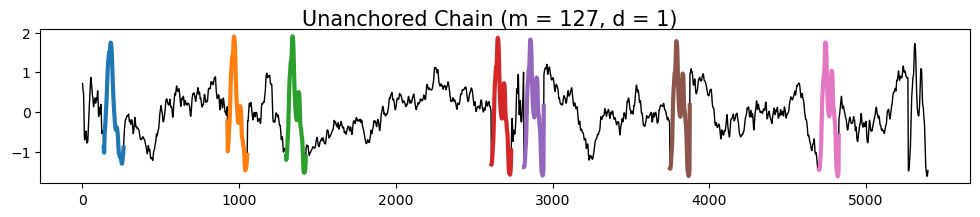

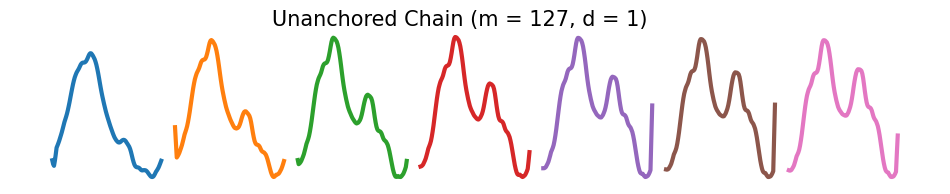

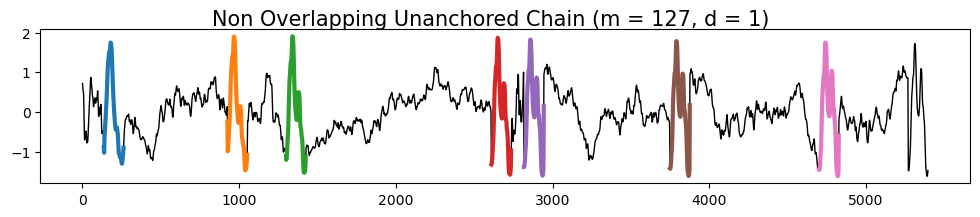

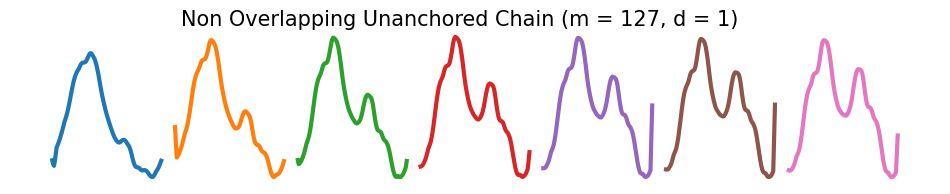

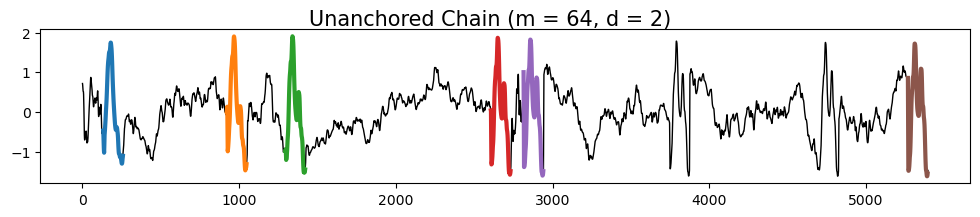

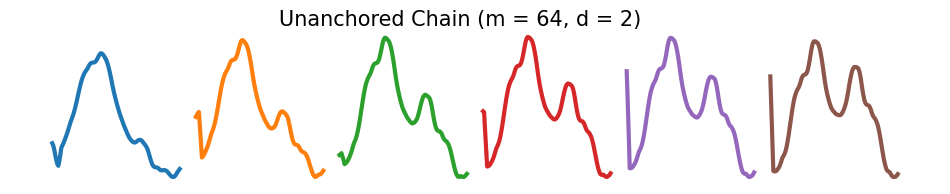

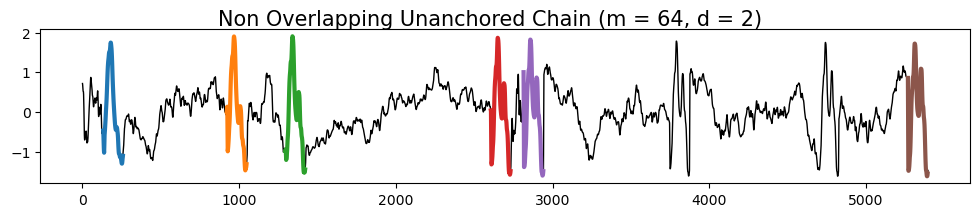

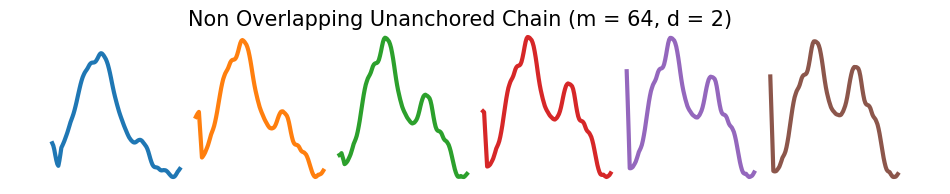

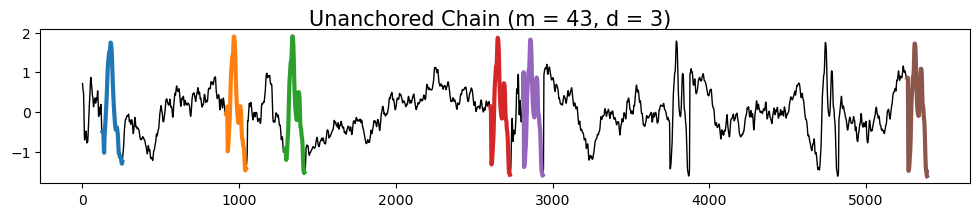

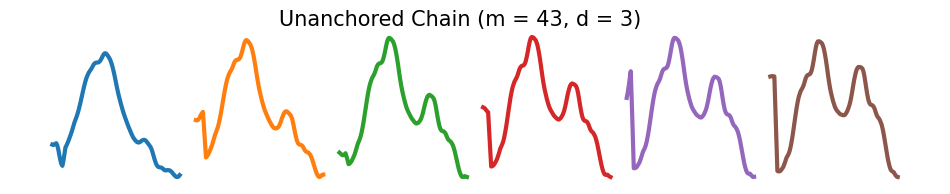

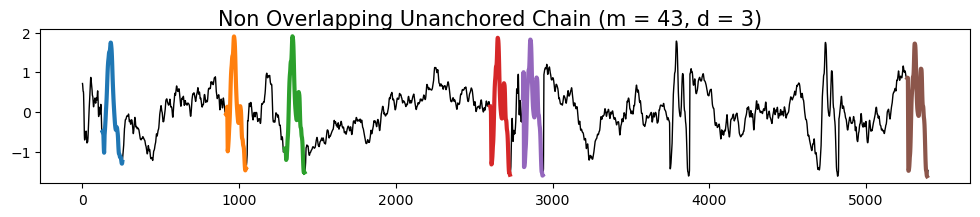

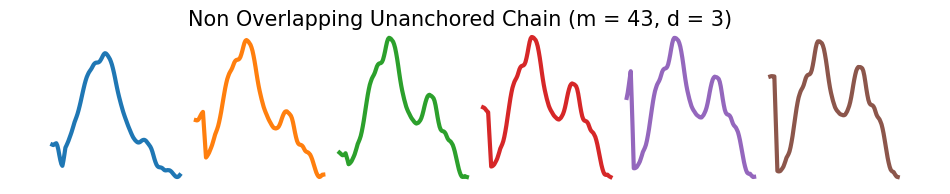

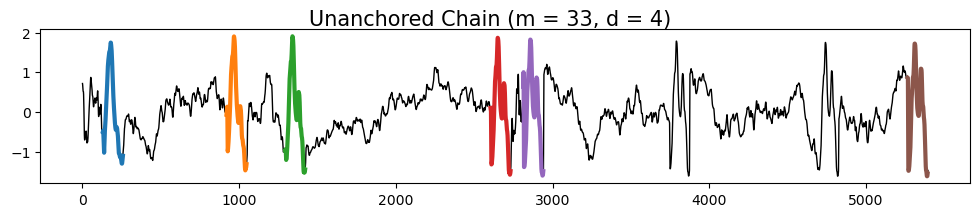

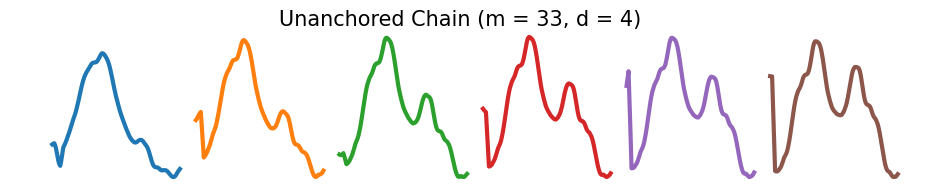

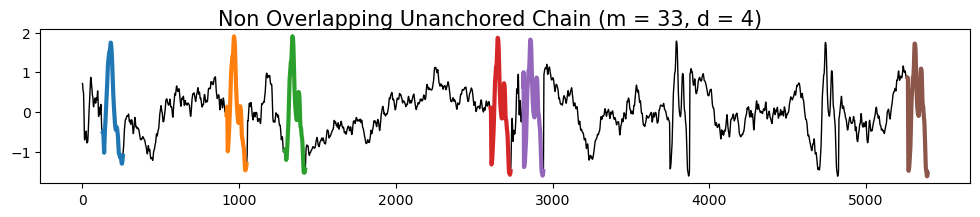

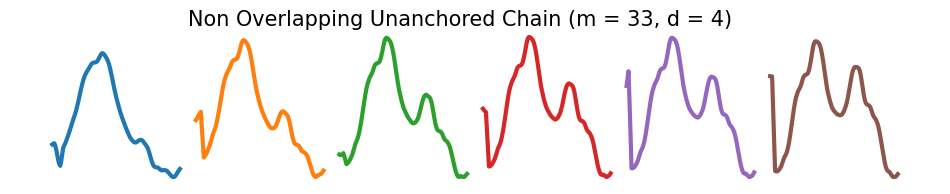

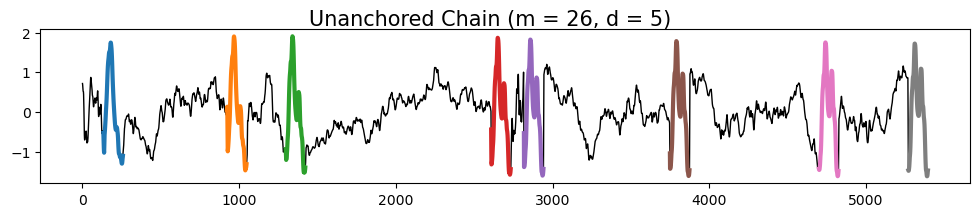

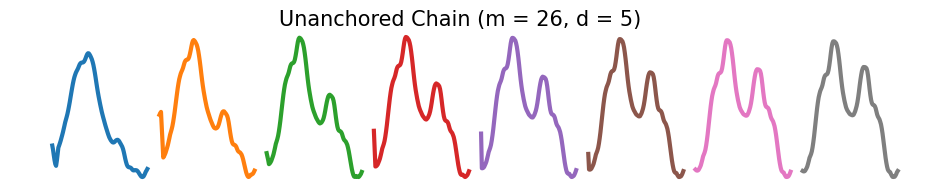

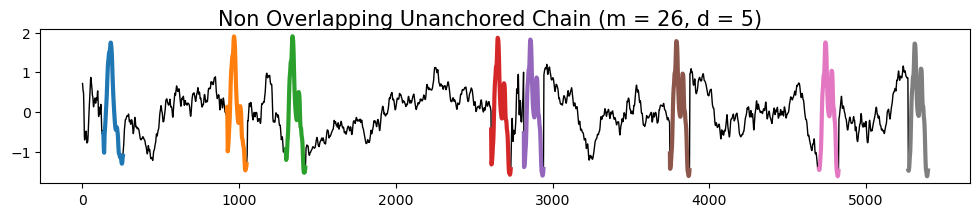

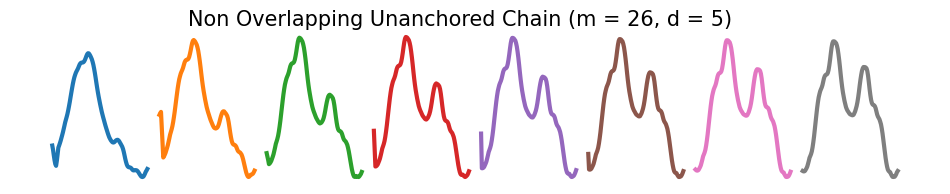

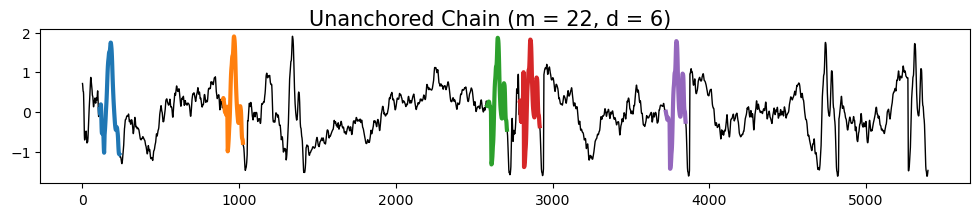

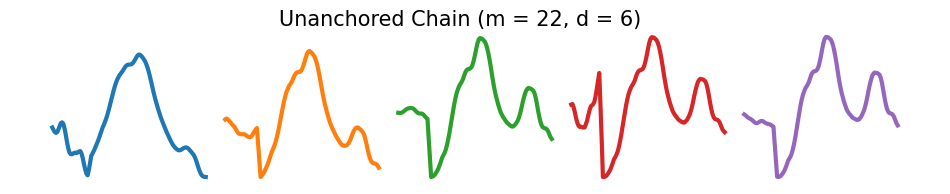

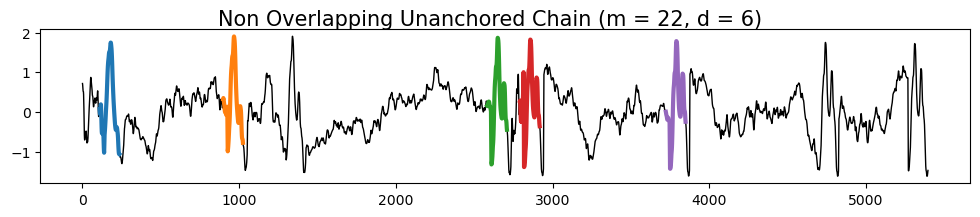

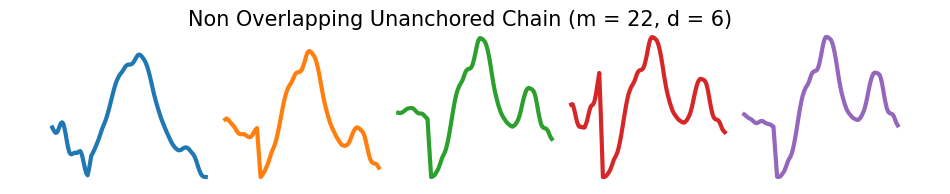

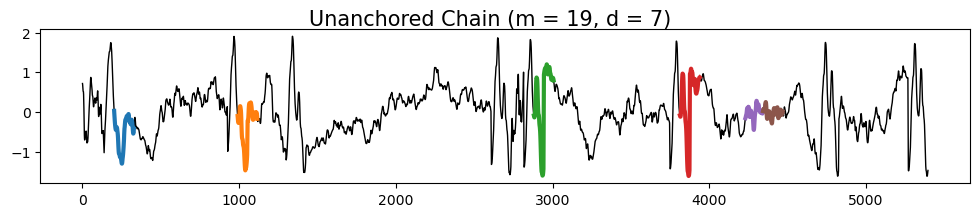

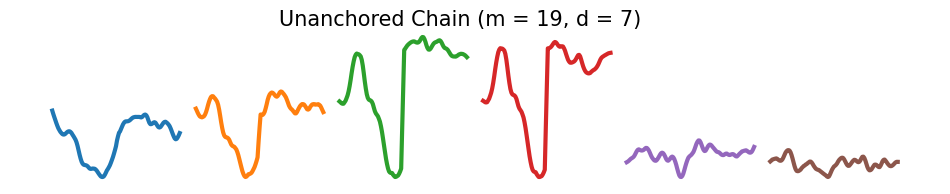

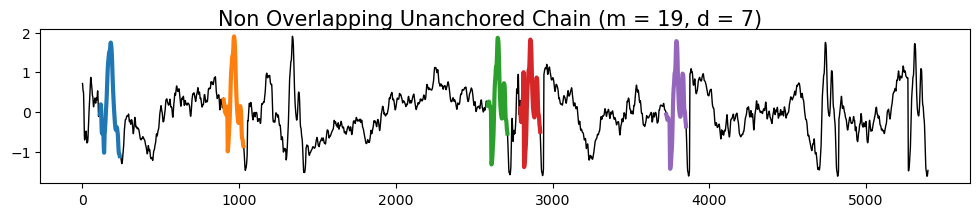

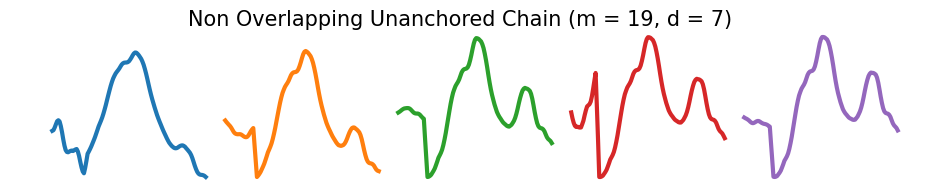

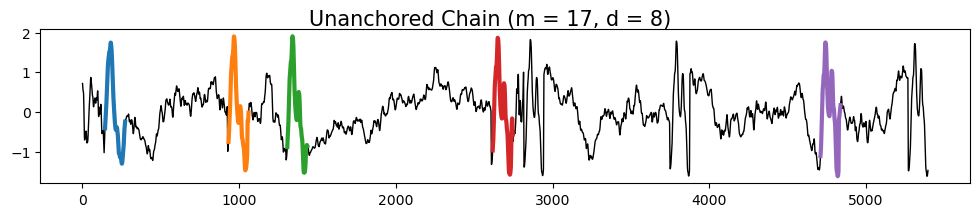

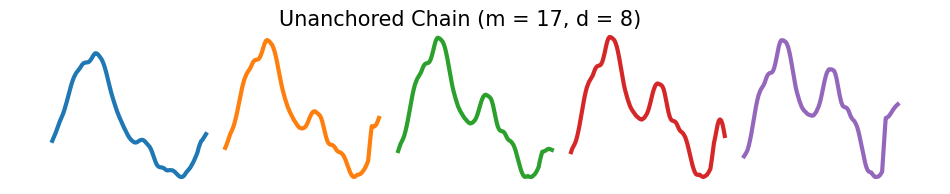

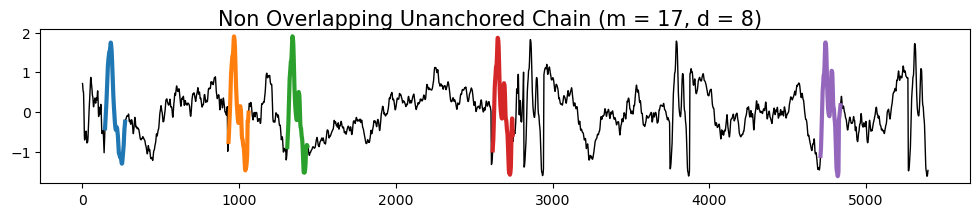

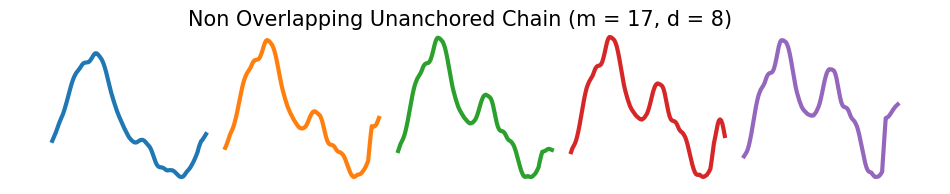

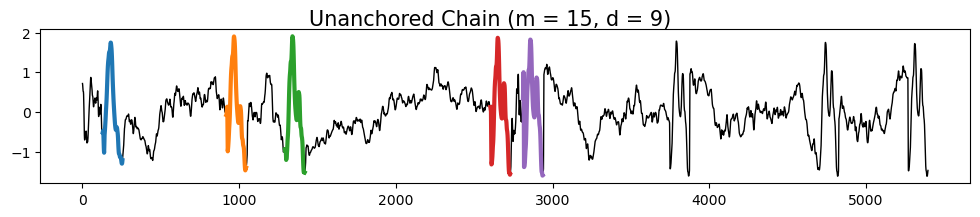

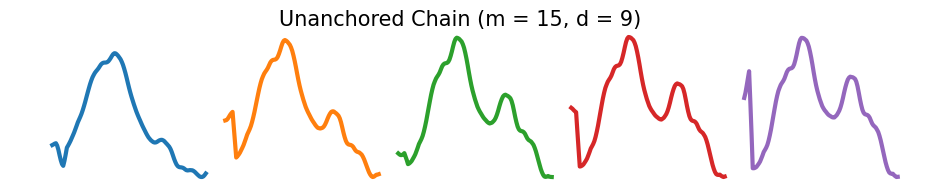

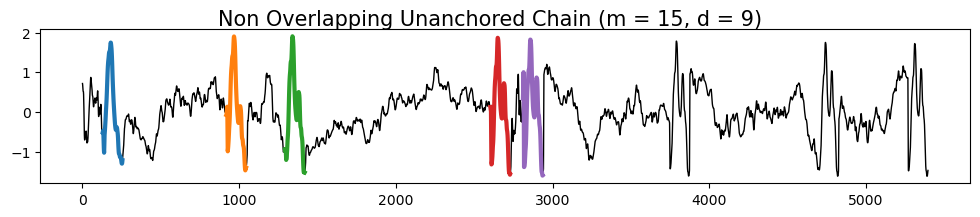

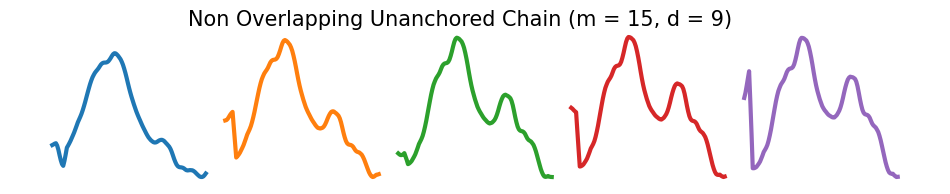

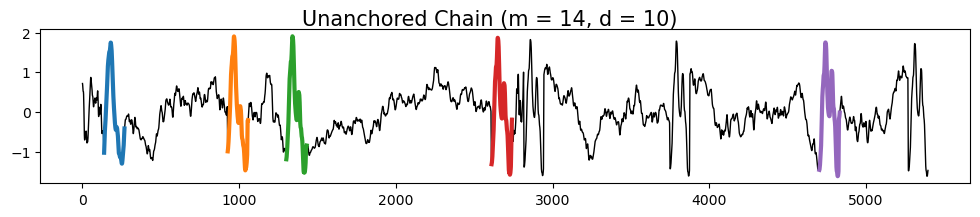

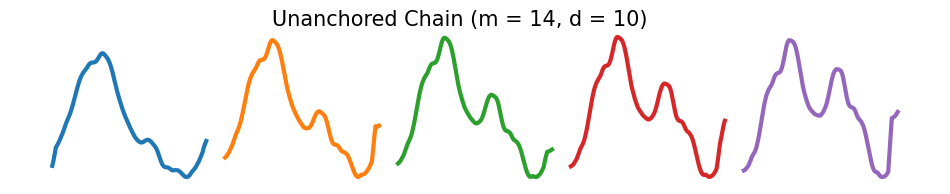

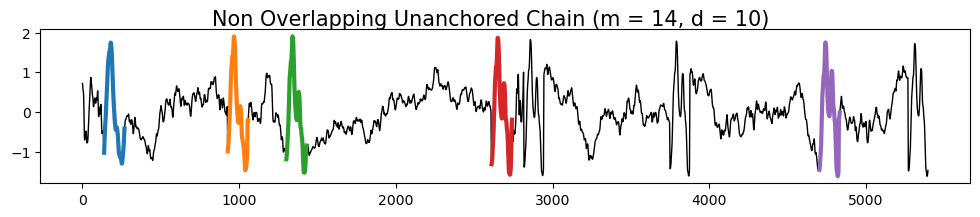

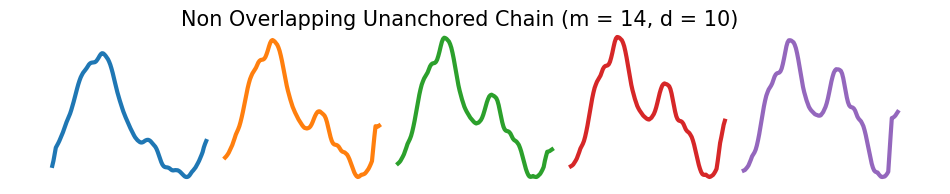

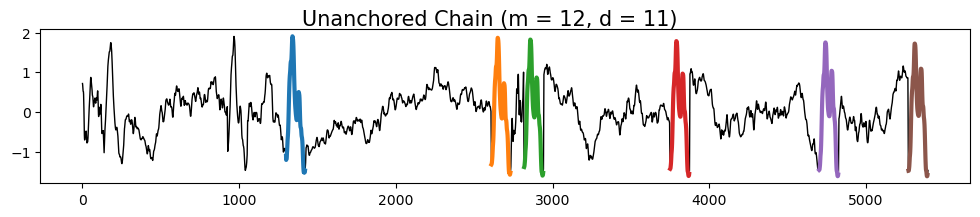

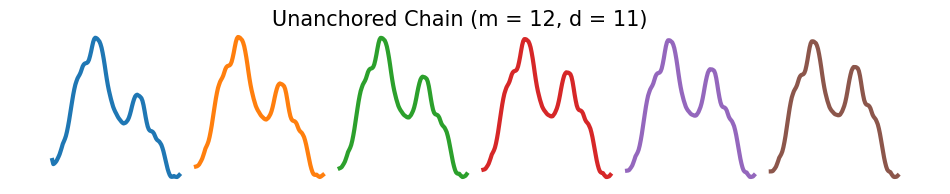

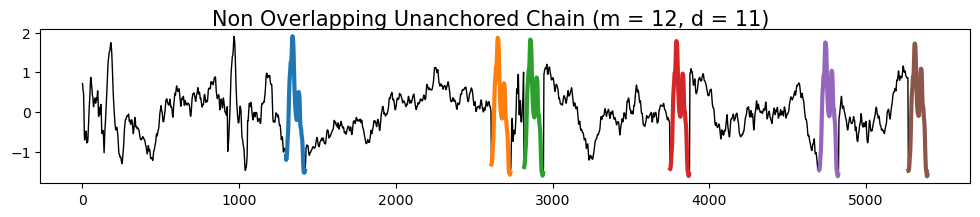

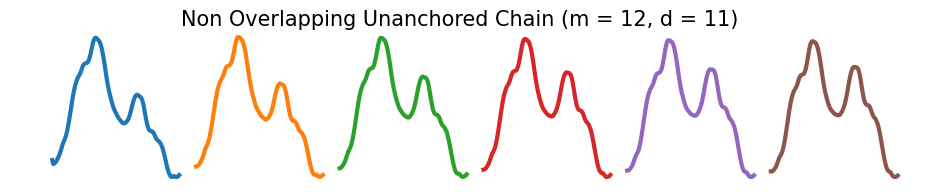

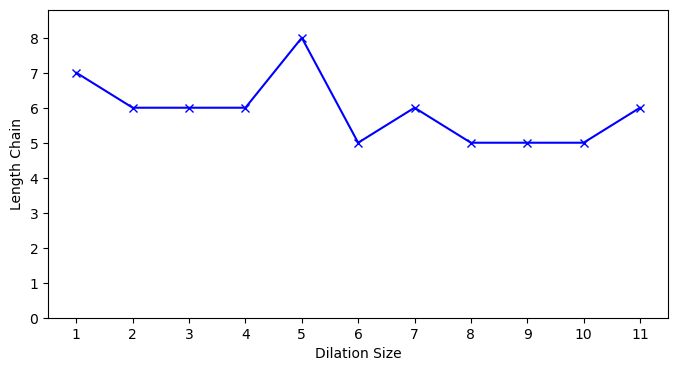

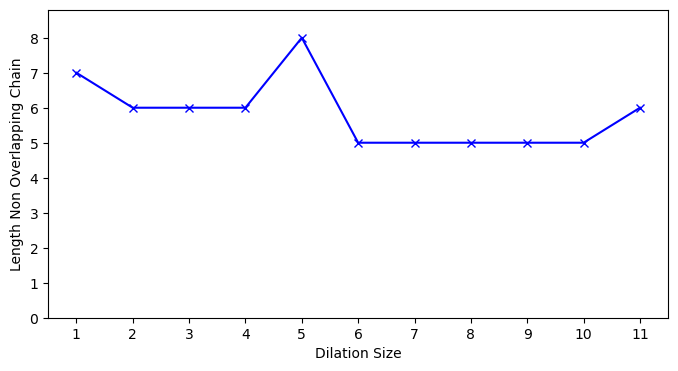

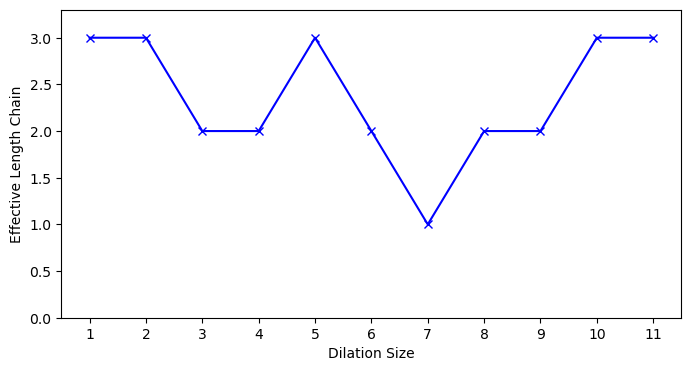

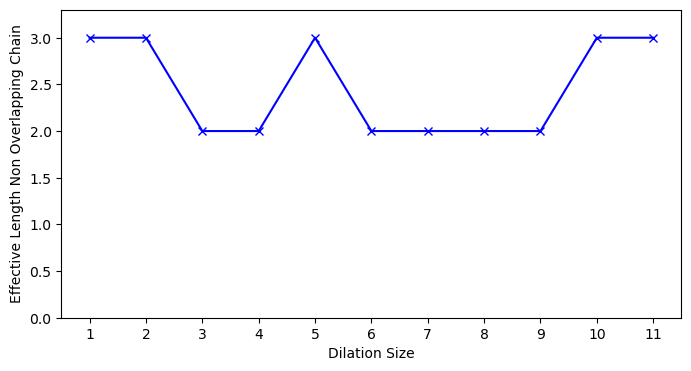

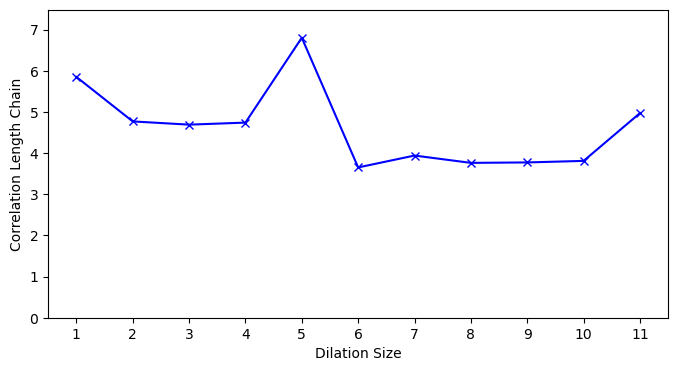

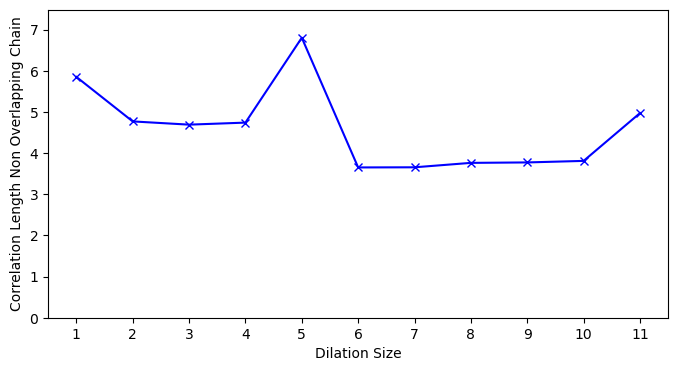

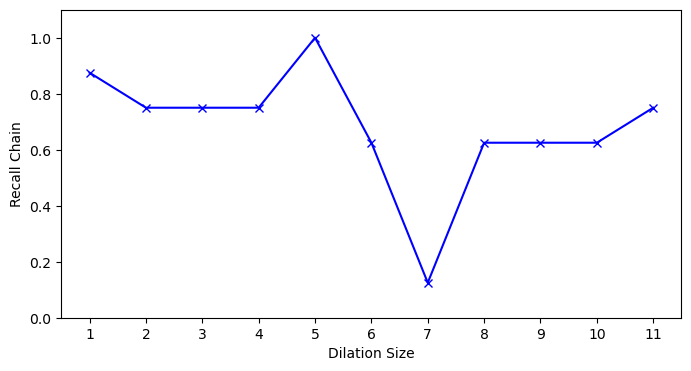

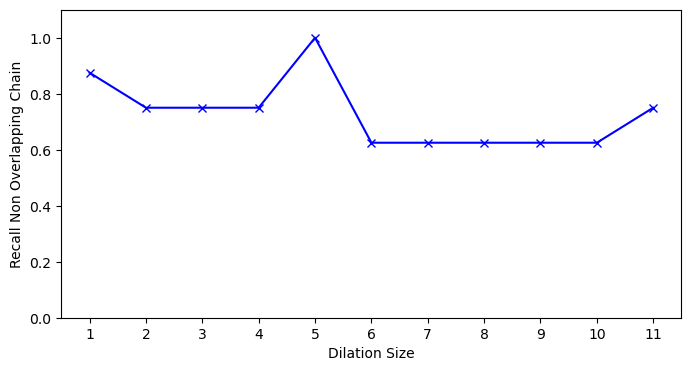

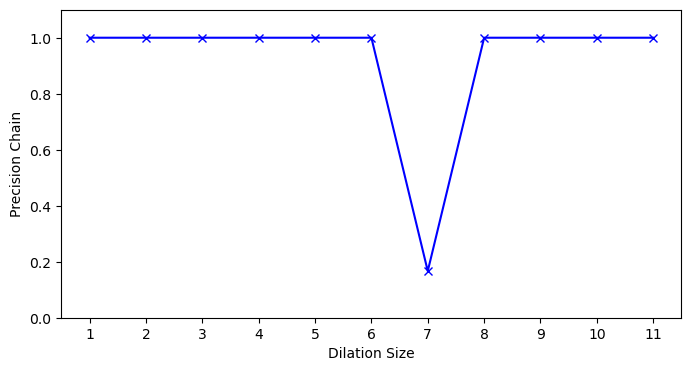

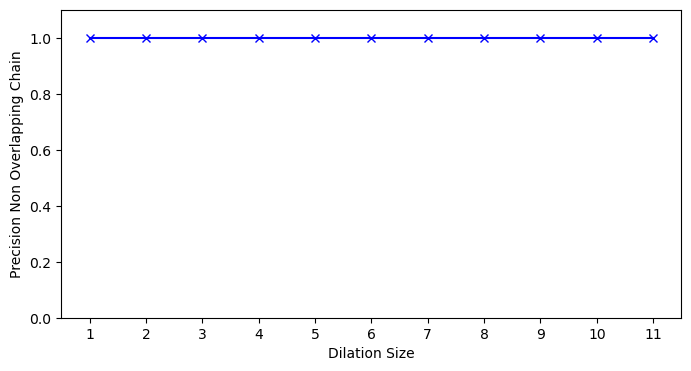

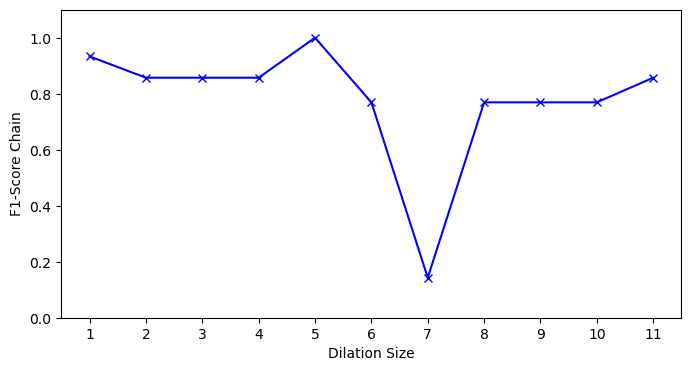

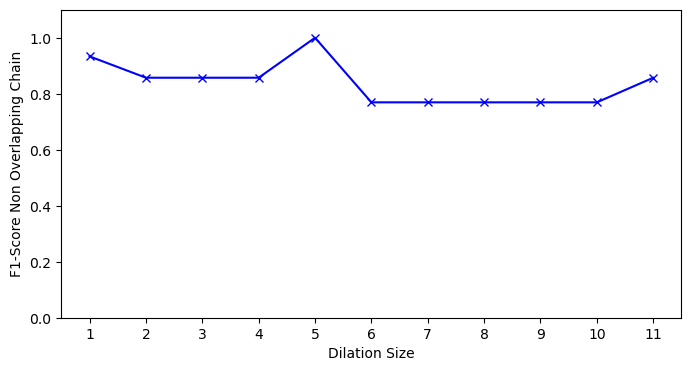

In [10]:
# visualize:
visualize.chains(dilation_sizes, target_w, data_name, use_case)